# How Are Graduation Rates Affected By Demographics?
___
We are going to work two datasets exported from _NYC Open Data_ . These data sets contain New York City public school information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [4]:
# Read in the data containing graduation rate information

grad = pd.read_csv('csvs/2001-2013_Graduation_Outcome_School_Level_-_ALL_ELL_SWD_ETHNICITY_GENDER_EVER_ELL_TRANSFER_SCHOOLS.csv')

In [5]:
# check the dimensions of the dataframe and the first 5 rows
print("No. of rows, columns: ", grad.shape) 
grad.head()

No. of rows, columns:  (20455, 24)


,DBN,School Name,Category,Cohort Year,Cohort,Cohort #,Toal Grads #,% of cohort,Total Regents #,% of cohort 1,% of grads,Advanced Regents #,% of cohort 2,% of grads 1,Regents without Advanced#,% of cohort 3,% of grads 2,Local #,% of cohort 4,% of grads 3,Still Enrolled #,% of cohort 5,Dropout #,% of cohort 6
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2013,4 year August,36,25,69.4,23,63.9,92.0,0,0.0,0.0,23,63.9,92.0,2,5.6,8.0,3,8.3,7,19.4
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2012,4 year August,44,24,54.5,20,45.5,83.3,1,2.3,4.2,19,43.2,79.2,4,9.1,16.7,10,22.7,10,22.7
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2011,4 year August,73,46,63.0,41,56.2,89.1,0,0.0,0.0,41,56.2,89.1,5,6.8,10.9,18,24.7,7,9.6
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2010,4 year August,61,26,42.6,26,42.6,100.0,1,1.6,3.8,25,41.0,96.2,0,0.0,0.0,18,29.5,17,27.9
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2009,4 year August,85,49,57.6,44,51.8,89.8,0,0.0,0.0,44,51.8,89.8,5,5.9,10.2,28,32.9,8,9.4


In [6]:
grad['School Name'].nunique() # check how many schools are in the dataset

538

In [7]:
diff = grad['Cohort #'] - (grad['Toal Grads #']+ grad['Dropout #'] + grad['Still Enrolled #'])
diff.mean()

4.834710339770227

* From the code & output above, we can deduce that `Cohort #` accounts for _total graduates, dropouts_ and those who are _still enrolled_. There is a small portion of the data missing.
___

In [8]:
diff = grad['Toal Grads #'] - (grad['Total Regents #'] + grad['Local #'])
diff.mean()

-0.01652407724272794

* From the above output, it can be concluded that `Toal Grads #` almost perfectly accounts for those with _regents diploma & local diploma_.
___

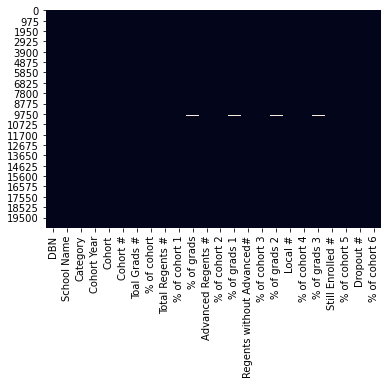

In [9]:
sns.heatmap(grad.isna(), cbar=False)  # visualize the missing values of the dataset

___
**Let's group the dataframe by 'DBN' and 'Cohort Year' to create a unique multi-index that we can merge the other dataset with.**

In [10]:
grad_grouped = grad.groupby(['DBN','Cohort Year']).max()
grad_grouped.head()

School Name      Category       Cohort  \
DBN    Cohort Year                                                          
01M292 2003         ORCHARD COLLEGIATE ACADEMY  All Students  6 year June   
       2004         ORCHARD COLLEGIATE ACADEMY  All Students  6 year June   
       2005         ORCHARD COLLEGIATE ACADEMY  All Students  6 year June   
       2006         ORCHARD COLLEGIATE ACADEMY  All Students  6 year June   
       2007         ORCHARD COLLEGIATE ACADEMY  All Students  6 year June   

                    Cohort #  Toal Grads #  % of cohort  Total Regents #  \
DBN    Cohort Year                                                         
01M292 2003                5             3         60.0                0   
       2004               58            41         73.2               18   
       2005               66            47         72.3               29   
       2006               78            44         62.0               37   
       2007               77            53         68.8               31   

                    % of cohort 1  % of grads  Advanced Regents #  \
DBN    Cohort Year                                                  
01M292 2003                   0.0         0.0                   0   
       2004                  32.1        46.2                   0   
       2005                  44.6        62.8                   0   
       2006                  50.7        84.1                   0   
       2007                  40.3        68.3                   0   

                    % of cohort 2  % of grads 1  Regents without Advanced#  \
DBN    Cohort Year                                                           
01M292 2003                   0.0           0.0                          0   
       2004                   0.0           0.0                         18   
       2005                   0.0           0.0                         29   
       2006                   0.0           0.0                         37   
       2007                   0.0           0.0                         31   

                    % of cohort 3  % of grads 2  Local #  % of cohort 4  \
DBN    Cohort Year                                                        
01M292 2003                   0.0           0.0        3           60.0   
       2004                  32.1          46.2       23           41.1   
       2005                  44.6          62.8       18           27.7   
       2006                  50.7          84.1        8           11.3   
       2007                  40.3          68.3       22           28.6   

                    % of grads 3  Still Enrolled #  % of cohort 5  Dropout #  \
DBN    Cohort Year                                                             
01M292 2003                100.0                 4           80.0          2   
       2004                 56.1                15           27.3         13   
       2005                 39.1                 9           14.1         11   
       2006                 18.2                16           20.5         21   
       2007                 41.5                25           32.5         16   

                    % of cohort 6  
DBN    Cohort Year                 
01M292 2003                  40.0  
       2004                  22.4  
       2005                  16.9  
       2006                  28.8  
       2007                  20.8

* **We aggregated by max() to capture highest graduation number for a given cohort year. Since, each year has multiple cohorts and 6-year cohorts have the 'total' or 'max' graduation rate for the given cohort year.**
___

In [11]:
grad_grouped.index

MultiIndex([('01M292', 2003),
            ('01M292', 2004),
            ('01M292', 2005),
            ('01M292', 2006),
            ('01M292', 2007),
            ('01M292', 2008),
            ('01M292', 2009),
            ('01M292', 2010),
            ('01M292', 2011),
            ('01M292', 2012),
            ...
            ('32K564', 2004),
            ('32K564', 2005),
            ('32K564', 2006),
            ('32K564', 2007),
            ('32K564', 2008),
            ('32K564', 2009),
            ('32K564', 2010),
            ('32K564', 2011),
            ('32K564', 2012),
            ('32K564', 2013)],
           names=['DBN', 'Cohort Year'], length=5018)

In [12]:
grad_grouped.columns

Index(['School Name', 'Category', 'Cohort', 'Cohort #', 'Toal Grads #',
       '% of cohort', 'Total Regents #', '% of cohort 1', '% of grads',
       'Advanced Regents #', '% of cohort 2', '% of grads 1',
       'Regents without Advanced#', '% of cohort 3', '% of grads 2', 'Local #',
       '% of cohort 4', '% of grads 3', 'Still Enrolled #', '% of cohort 5',
       'Dropout #', '% of cohort 6'],
      dtype='object')

* We should remove most of these columns as they are direct functions of the target variable, which is graduation rate.
___

In [13]:
grad_grouped = grad_grouped[['Cohort #', 'Toal Grads #', '% of cohort']]

In [14]:
print(grad_grouped.shape)
grad_grouped.head()

(5018, 3)


Cohort #  Toal Grads #  % of cohort
DBN    Cohort Year                                     
01M292 2003                5             3         60.0
       2004               58            41         73.2
       2005               66            47         72.3
       2006               78            44         62.0
       2007               77            53         68.8

In [17]:
# read in the dataset with demographics information
demos = pd.read_csv('csvs/2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv')

In [18]:
print("No. of rows, columns: ", demos.shape)  # check the dimensions and a few rows
demos.tail()

No. of rows, columns:  (10075, 38)


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,NaN,NaN,21.0,5.9,21.0,5.9,4,NaN,1,0.3,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383,NaN,NaN,10.0,2.6,28.0,7.3,13,NaN,3,0.8,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395,NaN,NaN,17.0,4.3,35.0,8.9,15,1,2,0.5,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420,NaN,NaN,20.0,4.8,37.0,8.8,17,NaN,1,0.2,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2
10074,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20112012,NaN,81.8,382,,,,,,,,,,,,382,,,20.0,5.2,36.0,9.4,14,1,1,0.3,137,35.9,235,61.5,7,1.8,169.0,44.2,213.0,55.8


In [19]:
# strip the dataset of whitespaces so it is easier to convert string columns to numeric type
def trystrip(col):
    try:
        col=col.str.strip().replace("",np.nan)
    except:
        pass
    return col
demos=demos.apply(lambda x: trystrip(x))

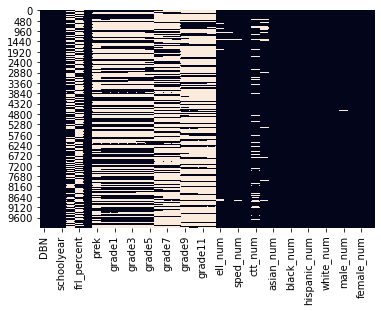

In [20]:
sns.heatmap(demos.isna(), cbar=False)

In [21]:
demos.DBN.nunique()  # check how many schools there are in this dataset

1594

In [22]:
demos.schoolyear.nunique()  # This should be 7 since it;s 2006-2012

7

In [23]:
#if this is approximately the # of rows in the dataset that means we dont have multiple cohorts for one year
1594*7

11158

In [24]:
# change the values in the school year column to reflect the start year of a class
demos['schoolyear'] = demos['schoolyear']//10000

In [25]:
demos['schoolyear'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [26]:
# Turn the non-numeric columns that we want to use into numeric types
hs_cols = ['grade9', 'grade10','grade11', 'grade12','grade6','grade7','grade8','fl_percent']
for n in hs_cols:
    demos[n] = demos[n].astype(float)

In [27]:
demos.dtypes

DBN                   object
Name                  object
schoolyear             int64
fl_percent           float64
frl_percent          float64
total_enrollment       int64
prek                  object
k                     object
grade1                object
grade2                object
grade3                object
grade4                object
grade5                object
grade6               float64
grade7               float64
grade8               float64
grade9               float64
grade10              float64
grade11              float64
grade12              float64
ell_num              float64
ell_percent          float64
sped_num             float64
sped_percent         float64
ctt_num               object
selfcontained_num     object
asian_num              int64
asian_per            float64
black_num              int64
black_per            float64
hispanic_num           int64
hispanic_per         float64
white_num              int64
white_per            float64
male_num      

___
**Let's group this column by _DBN_ and _schoolyear_ like the previous dataframe so we merge them easily. The aggregate should not make a difference since each school and year corresponds to only one row.**

In [28]:
demos_grpd = demos.groupby(['DBN','schoolyear']).mean()
print(demos_grpd.shape)
demos_grpd.tail()

(10075, 26)


fl_percent  frl_percent  total_enrollment  grade6  grade7  \
DBN    schoolyear                                                              
32K564 2007              85.6          NaN               355     NaN     NaN   
       2008              65.2          NaN               383     NaN     NaN   
       2009               NaN         89.2               395     NaN     NaN   
       2010               NaN         88.2               420     NaN     NaN   
       2011               NaN         81.8               382     NaN     NaN   

                   grade8  grade9  grade10  grade11  grade12  ell_num  \
DBN    schoolyear                                                       
32K564 2007           NaN     NaN    355.0      NaN      NaN     21.0   
       2008           NaN     NaN    383.0      NaN      NaN     10.0   
       2009           NaN     NaN    395.0      NaN      NaN     17.0   
       2010           NaN     NaN    420.0      NaN      NaN     20.0   
       2011           NaN     NaN    382.0      NaN      NaN     20.0   

                   ell_percent  sped_num  sped_percent  asian_num  asian_per  \
DBN    schoolyear                                                              
32K564 2007                5.9      21.0           5.9          1        0.3   
       2008                2.6      28.0           7.3          3        0.8   
       2009                4.3      35.0           8.9          2        0.5   
       2010                4.8      37.0           8.8          1        0.2   
       2011                5.2      36.0           9.4          1        0.3   

                   black_num  black_per  hispanic_num  hispanic_per  \
DBN    schoolyear                                                     
32K564 2007              151       42.5           198          55.8   
       2008              132       34.5           245          64.0   
       2009              146       37.0           242          61.3   
       2010              166       39.5           242          57.6   
       2011              137       35.9           235          61.5   

                   white_num  white_per  male_num  male_per  female_num  \
DBN    schoolyear                                                         
32K564 2007                5        1.4     181.0      51.0       174.0   
       2008                2        0.5     206.0      53.8       177.0   
       2009                3        0.8     199.0      50.4       196.0   
       2010                8        1.9     209.0      49.8       211.0   
       2011                7        1.8     169.0      44.2       213.0   

                   female_per  
DBN    schoolyear              
32K564 2007              49.0  
       2008              46.2  
       2009              49.6  
       2010              50.2  
       2011              55.8

___
* Merge the two dataframes. We will be left with only the High Schools information that we need.

In [29]:
merged = grad_grouped.merge(demos_grpd, left_index=True, right_on=['DBN', 'schoolyear'])

In [30]:
print(merged.shape)  # check the number of rows we are left with and print the first 5 rows
merged.head()

(2815, 29)


Cohort #  Toal Grads #  % of cohort  fl_percent  \
DBN    schoolyear                                                    
01M292 2005              66            47         72.3        99.0   
       2006              78            44         62.0        85.6   
       2007              77            53         68.8        99.5   
       2008              70            40         58.8        95.3   
       2009              85            61         74.4         NaN   

                   frl_percent  total_enrollment  grade6  grade7  grade8  \
DBN    schoolyear                                                          
01M292 2005                NaN               294     NaN    83.0    61.0   
       2006                NaN               434    53.0    73.0    83.0   
       2007                NaN               515    66.0    57.0    78.0   
       2008                NaN               470    50.0    59.0    66.0   
       2009               69.9               511    38.0    50.0    83.0   

                   grade9  grade10  grade11  grade12  ell_num  ell_percent  \
DBN    schoolyear                                                            
01M292 2005          87.0     63.0      NaN      NaN     29.0          9.9   
       2006          92.0     72.0     61.0      NaN     46.0         10.6   
       2007         109.0     82.0     67.0     56.0     52.0         10.1   
       2008          97.0     85.0     60.0     53.0     50.0         10.6   
       2009         109.0     89.0     87.0     55.0     81.0         15.9   

                   sped_num  sped_percent  asian_num  asian_per  black_num  \
DBN    schoolyear                                                            
01M292 2005            56.0          19.0         34       11.6        106   
       2006            97.0          22.4         57       13.1        137   
       2007           124.0          24.1         56       10.9        158   
       2008           118.0          25.1         47       10.0        138   
       2009           112.0          21.9         52       10.2        141   

                   black_per  hispanic_num  hispanic_per  white_num  \
DBN    schoolyear                                                     
01M292 2005             36.1           133          45.2         10   
       2006             31.6           208          47.9         14   
       2007             30.7           272          52.8         12   
       2008             29.4           264          56.2         14   
       2009             27.6           290          56.8         16   

                   white_per  male_num  male_per  female_num  female_per  
DBN    schoolyear                                                         
01M292 2005              3.4     160.0      54.4       134.0        45.6  
       2006              3.2     241.0      55.5       193.0        44.5  
       2007              2.3     281.0      54.6       234.0        45.4  
       2008              3.0     264.0      56.2       206.0        43.8  
       2009              3.1     297.0      58.1       214.0        41.9

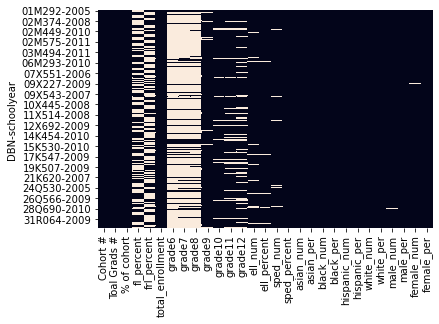

In [31]:
sns.heatmap(merged.isna(), cbar = False)  # visualize the missing values

In [32]:
merged.reset_index(inplace = True)  # reset the multi-index

In [33]:
merged.columns # check if the multi-index have transformed back into columns

Index(['DBN', 'schoolyear', 'Cohort #', 'Toal Grads #', '% of cohort',
       'fl_percent', 'frl_percent', 'total_enrollment', 'grade6', 'grade7',
       'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'ell_num',
       'ell_percent', 'sped_num', 'sped_percent', 'asian_num', 'asian_per',
       'black_num', 'black_per', 'hispanic_num', 'hispanic_per', 'white_num',
       'white_per', 'male_num', 'male_per', 'female_num', 'female_per'],
      dtype='object')

In [34]:
merged.DBN.nunique()  # how many school are we working with

481

In [35]:
# grouping and aggregating by max on the graduation dataset lets us capture the highest number of graduates for
# a freshman class
merged['Toal Grads #'].mean()

140.5385435168739

In [36]:
merged.isnull().sum() # check the count of missing values in each column

DBN                    0
schoolyear             0
Cohort #               0
Toal Grads #           0
% of cohort            0
fl_percent          1316
frl_percent         1499
total_enrollment       0
grade6              2386
grade7              2332
grade8              2332
grade9                79
grade10              139
grade11              323
grade12              511
ell_num              100
ell_percent           52
sped_num              55
sped_percent           0
asian_num              0
asian_per              0
black_num              0
black_per              0
hispanic_num           0
hispanic_per           0
white_num              0
white_per              0
male_num              23
male_per               0
female_num            11
female_per             0
dtype: int64

In [37]:
# find out the number of school that are purely high schools with no grade 6, 7, or 8
only_HS = merged[merged['grade6'].isnull() & merged['grade7'].isnull() & merged['grade8'].isnull()]
only_HS.shape  

(2292, 31)

In [38]:
# create a boolean column to denote what schools have at least one junior high level cohort
merged['has_junior_high'] = np.where(merged['grade6'].notnull() | merged['grade7'].notnull() | 
                                     merged['grade8'], 1,0)
merged['has_junior_high'].value_counts()

0    2292
1     523
Name: has_junior_high, dtype: int64

In [39]:
# These two columns are heavily related, one is NaN when the other has a value
merged['fl_percent'].fillna(0, inplace=True)
merged['frl_percent'].fillna(0, inplace=True) # impute 0 for both columns missing entries

In [40]:
# inspect schools with no male students
merged[merged['male_num'].isnull()].head()

,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high
128,02M316,2005,77,59,81.7,60.0,0.0,107,NaN,NaN,NaN,107.0,NaN,NaN,NaN,1.0,0.9,11.0,10.3,1,0.9,26,24.3,68,63.6,3,2.8,NaN,0.0,107.0,100.0,0
129,02M316,2006,74,60,82.2,73.8,0.0,206,NaN,NaN,NaN,113.0,93.0,NaN,NaN,8.0,3.9,17.0,8.3,7,3.4,72,35.0,111,53.9,3,1.5,NaN,0.0,206.0,100.0,0
130,02M316,2007,61,51,91.1,60.3,0.0,292,NaN,NaN,NaN,120.0,90.0,82.0,NaN,17.0,5.8,44.0,15.1,8,2.7,106,36.3,156,53.4,3,1.0,NaN,0.0,292.0,100.0,0
131,02M316,2008,61,45,76.3,66.3,0.0,336,NaN,NaN,NaN,96.0,90.0,80.0,70.0,16.0,4.8,47.0,14.0,9,2.7,140,41.7,178,53.0,5,1.5,NaN,0.0,336.0,100.0,0
132,02M316,2009,81,66,85.7,0.0,77.8,350,NaN,NaN,NaN,123.0,87.0,71.0,69.0,20.0,5.7,64.0,18.3,8,2.3,148,42.3,186,53.1,5,1.4,NaN,0.0,350.0,100.0,0


In [41]:
# impute 0 for missing number of male student values since these are all-female schools
merged['male_num'].fillna(0, inplace = True)

In [42]:
# inspect schools with no female students
merged[merged['female_num'].isnull()].head()

,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high
948,09X231,2005,85,72,86.7,67.9,0.0,191,NaN,NaN,NaN,92.0,99.0,NaN,NaN,7.0,3.7,6.0,3.1,0,0.0,106,55.5,63,33.0,6,3.1,191.0,100.0,NaN,0.0,0
949,09X231,2006,100,82,82.0,65.2,0.0,269,NaN,NaN,NaN,175.0,79.0,15.0,NaN,8.0,3.0,28.0,10.4,2,0.7,153,56.9,81,30.1,4,1.5,269.0,100.0,NaN,0.0,0
950,09X231,2007,117,92,80.7,62.0,0.0,401,NaN,NaN,NaN,123.0,112.0,89.0,77.0,13.0,3.2,45.0,11.2,2,0.5,228,56.9,129,32.2,5,1.2,401.0,100.0,NaN,0.0,0
951,09X231,2008,107,84,81.6,62.8,0.0,422,NaN,NaN,NaN,100.0,123.0,107.0,92.0,13.0,3.1,62.0,14.7,5,1.2,275,65.2,137,32.5,4,0.9,422.0,100.0,NaN,0.0,0
952,09X231,2009,80,59,78.7,0.0,71.1,449,NaN,NaN,NaN,112.0,110.0,116.0,111.0,14.0,3.1,91.0,20.3,7,1.6,282,62.8,150,33.4,1,0.2,449.0,100.0,NaN,0.0,0


In [43]:
# impute 0 for missing number of female student values since these are all-male schools
merged['female_num'].fillna(0, inplace = True)

In [44]:
cols = ['ell_num','ell_percent','sped_num']  # we can do the same for these columns also
for col in cols:
    merged[col].fillna(0, inplace = True)

In [45]:
merged.head()

,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high
0,01M292,2005,66,47,72.3,99.0,0.0,294,NaN,83.0,61.0,87.0,63.0,NaN,NaN,29.0,9.9,56.0,19.0,34,11.6,106,36.1,133,45.2,10,3.4,160.0,54.4,134.0,45.6,1
1,01M292,2006,78,44,62.0,85.6,0.0,434,53.0,73.0,83.0,92.0,72.0,61.0,NaN,46.0,10.6,97.0,22.4,57,13.1,137,31.6,208,47.9,14,3.2,241.0,55.5,193.0,44.5,1
2,01M292,2007,77,53,68.8,99.5,0.0,515,66.0,57.0,78.0,109.0,82.0,67.0,56.0,52.0,10.1,124.0,24.1,56,10.9,158,30.7,272,52.8,12,2.3,281.0,54.6,234.0,45.4,1
3,01M292,2008,70,40,58.8,95.3,0.0,470,50.0,59.0,66.0,97.0,85.0,60.0,53.0,50.0,10.6,118.0,25.1,47,10.0,138,29.4,264,56.2,14,3.0,264.0,56.2,206.0,43.8,1
4,01M292,2009,85,61,74.4,0.0,69.9,511,38.0,50.0,83.0,109.0,89.0,87.0,55.0,81.0,15.9,112.0,21.9,52,10.2,141,27.6,290,56.8,16,3.1,297.0,58.1,214.0,41.9,1


___
* Now, we have to deal with missing values in the high school grade levels and how to impute them
* More than 80% of the Junior High grades level have values missing. Therefore, we can choose to drop them later.

* **Let's create a new column by adding the grade levels and checking if it matches up with the `total_enrollment` column.** This can give us a better idea on how to impute the missing values.

In [46]:
# Lets fill the NaN values with 0 for now otherwise adding and subtracting operations will not work properly.

merged.fillna(0, inplace=True)

In [47]:
merged['total_students'] = merged['grade6']+ merged['grade7']+merged['grade8']+merged['grade9']+merged['grade10']+merged['grade11']+merged['grade12']

In [48]:
# create another boolean column that checks if total_enrollment and 'total_students' are equal
merged['true'] = merged['total_enrollment'] == merged['total_students']

In [49]:
merged['true'].value_counts()

True     2782
False      33
Name: true, dtype: int64

* We can conclude that most of the missing values for grade levels are due to the fact that those classes are simply empty. Let's check the rows that don't add up.
___

In [50]:
# remember, 0 would mean NaN values that we replaced before
false = merged[merged['true'] == False]
false

,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,true
37,01M539,2005,49,49,100.0,18.9,0.0,755,80.0,92.0,47.0,57.0,64.0,60.0,8.0,1.0,0.1,37.0,4.9,132,17.5,61,8.1,132,17.5,416,55.1,330.0,43.7,425.0,56.3,1,408.0,False
38,01M539,2006,46,46,100.0,14.6,0.0,879,74.0,69.0,84.0,50.0,50.0,64.0,57.0,0.0,0.0,40.0,4.6,182,20.7,64,7.3,132,15.0,499,56.8,393.0,44.7,486.0,55.3,1,448.0,False
39,01M539,2007,128,123,96.9,11.8,0.0,1063,119.0,73.0,68.0,146.0,52.0,50.0,57.0,5.0,0.5,42.0,4.0,238,22.4,103,9.7,163,15.3,551,51.8,491.0,46.2,572.0,53.8,1,565.0,False
40,01M539,2008,161,159,98.8,12.6,0.0,1302,157.0,116.0,71.0,177.0,140.0,50.0,48.0,3.0,0.2,50.0,3.8,284,21.8,146,11.2,216,16.6,643,49.4,625.0,48.0,677.0,52.0,1,759.0,False
41,01M539,2009,137,134,97.8,0.0,19.6,1480,137.0,146.0,111.0,145.0,177.0,130.0,47.0,7.0,0.5,47.0,3.2,373,25.2,172,11.6,234,15.8,660,44.6,705.0,47.6,775.0,52.4,1,893.0,False
42,01M539,2010,113,109,97.3,0.0,24.4,1583,135.0,118.0,142.0,119.0,147.0,163.0,128.0,6.0,0.4,44.0,2.8,411,26.0,192,12.1,241,15.2,725,45.8,766.0,48.4,817.0,51.6,1,952.0,False
43,01M539,2011,122,121,100.0,0.0,23.0,1613,149.0,126.0,117.0,117.0,123.0,147.0,157.0,4.0,0.2,43.0,2.7,448,27.8,189,11.7,229,14.2,725,44.9,794.0,49.2,819.0,50.8,1,936.0,False
156,02M400,2006,352,308,88.0,41.0,0.0,1447,0.0,0.0,0.0,482.0,389.0,297.0,278.0,57.0,3.9,153.0,10.6,244,16.9,334,23.1,633,43.7,221,15.3,709.0,49.0,738.0,51.0,0,1446.0,False
447,02M625,2005,368,184,50.0,71.6,0.0,1955,0.0,0.0,2.0,970.0,563.0,226.0,193.0,230.0,11.8,293.0,15.0,34,1.7,714,36.5,1139,58.3,47,2.4,1146.0,58.6,809.0,41.4,1,1954.0,False
509,03M470,2005,580,295,51.7,82.9,0.0,2751,0.0,0.0,0.0,1249.0,822.0,349.0,330.0,519.0,18.9,330.0,12.0,56,2.0,921,33.5,1683,61.2,45,1.6,1277.0,46.4,1474.0,53.6,0,2750.0,False
